# Linear Regression

## Linear Regression 모델
> `Linear Regression`은 예측을 위한 머신러닝 모델이다.  
사용해야하는 설명변수의 갯수에 따라 설명변수 하나를 사용하는 **단순회귀모델**과 설명변수 여러개를 사용하는 **다중회귀모델**로 구분한다.  
실제로는 다중회귀모델을 많이 사용하며 종속변수가 여러개인 **multi-output linear**  
설명변수에 패널티를 추가한 `Lasso`, `Ridge` 모델까지 확장이 가능하다.  
>> `y = f(x)` 의 기본적인 머신러닝 함수에서  
`y` : 종속변수(예측하고자 하는 값, 타겟, 연속형 변수)  
`f( )` : Linear model, 예측문제를 풀어내는 함수 혹은 모델  
`x` : 설명변수(종속변수에 영향을 주는 데이터, feature, 연속형 혹은 이산형 변수) 로 설명이 가능하다.


## Regression 이란?
> 일반적으로 선형회귀방정식이라 부름.  
종속변수와 독립변수 사이의 관계를 분석할 경우 많이 사용함  

>>통계학 - 한 개의 독립변수와 종속변수 간 관계를 잘 설명하는 직선(회귀직선)을 추정한다. 데이터 분할 X  
머신러닝 - 모델자체에는 크게 관심을 두지 않고 예측을 위해 사용한다. 데이터 분할 O

## 단순선형회귀모델(Simple Linear Regression)
아래 샘플예제에서 $f(x) = 2x$ 가 가장 데이터를 잘 설명하는 직선이 된다.  
한 개의 독립 변수와 종속 변수 간 관계를 잘 설명하는 직선을 단순회귀모델이라고 한다.  
  
단순회귀모델의 구조는 아래와 같다.  

# $$ y_i = \beta_0 + \beta_1 x_i + \varepsilon_i  $$  

> $\beta_0$ : 절편  
$\beta_1$ : 기울기  
$x_i$ : $i$ 번째 샘플의 독립변수 값  
$y_i$ : $i$ 번째 샘플의 종속변수 값  
$\hat{y}_i$ : $i$ 번째 샘플의 종속변수 예측 값 ($\hat{y}_i = \beta_0 + \beta_1 x_i$)  
$\varepsilon_i$ : $i$ 번째 샘플의 예측 오차 ($y_i - \hat{y}_i$)

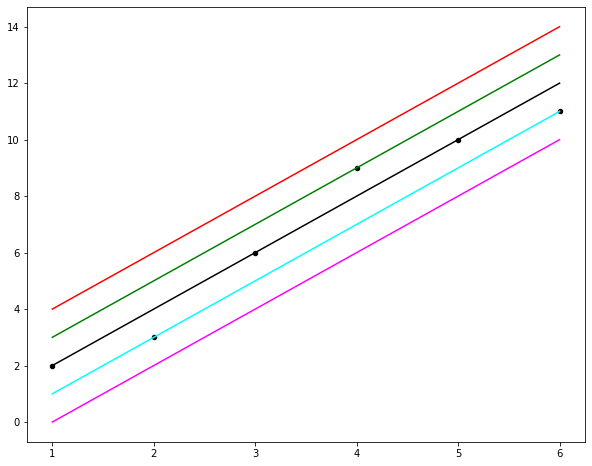

In [88]:
plt.figure(figsize=(10, 8))
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2, 3, 6, 9, 10, 11])
plt.scatter(x, y, s=20, c='black')
plt.plot(x, 2 * x + 2, c='red');
plt.plot(x, 2 * x + 1, c='green');
plt.plot(x, 2 * x - 1, c='cyan');
plt.plot(x, 2 * x - 2, c='magenta');
plt.plot(x, 2 * x, c='black');
# plt.plot(x, 2.5 * x - 1, c='green');

### 모델 학습(traing, fitting)
회귀모델의 학습은 회귀모델에 포함된 계수인 $\beta_0$ 와 $\beta_1$을 추정한다.  
최소자승법(least square method): 회귀모델은 오차의 제곱합을 최소화하는 방향으로 계수를 추정.  

#### 비용 함수 (cost function)
$$ Cost = {1\over2n} \sum_i^n{(y_i - \hat y_i)^2}$$

In [85]:
# 가정함수 h
def h1(x):
    return x * 2
def h2(x):
    return x * 2 + 1
def h3(x):
    return x * 2 + 2
def h4(x):
    return x * 2 - 1
def h5(x):
    return x * 2 - 2

In [82]:
# 비용함수 j
def j(x, h, y):
    return sum(np.square(y - h(x))) / 2 * len(x)

In [86]:
print(j(x, h1, y))
print(j(x, h2, y))
print(j(x, h3, y))
print(j(x, h4, y))
print(j(x, h5, y))

9.0
33.0
93.0
21.0
69.0


![gradient](./image/gradient_decent.png)

#### 비용함수의 최소화, 경사하강법 (gradient decent)
위에서 정의 된 비용함수 $ Cost = {1\over2n} \sum_i^n{(y_i - \hat y_i)^2}$ 의 최소값을 찾기 위해서는 미분이 필요하다.

![gradient](./image/gradient_decent2.gif)

#### 비용함수의 최소화, 정규방정식
비용함수의 미분을 통한 정규방정식을 행렬연산을 통하여 구할 수 있다. 참고자료 확인
![sol1](./image/sol1.png)
![sol2](./image/sol2.png)

### 단순선형회귀모델 실습

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [89]:
df = pd.read_csv('./data/boston.csv')

In [92]:
x = df['RM']
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y)

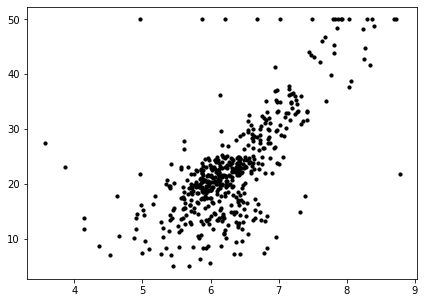

In [122]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, s=10, c='black')

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
model = LinearRegression()

In [105]:
model.fit(np.array(x_train).reshape(-1, 1), y_train)

LinearRegression()

In [109]:
x_train.shape, np.array(x_train).reshape(-1, 1).shape

((379,), (379, 1))

In [107]:
model.predict(np.array([8]).reshape(-1, 1))

array([37.7113053])

In [115]:
y_pred = model.predict(np.array(x_test).reshape(-1, 1))

In [117]:
print('방수: ', x_test.values[:3])
print('예측값: ', y_pred[:3])
print('실제값: ', y_test.values[:3])

방수:  [6.454 4.652 6.376]
예측값:  [24.0050672   8.0292321  23.31354936]
실제값:  [17.1 10.5 17.7]


In [118]:
model.coef_, model.intercept_

(array([8.86561326]), -33.21360079637667)

In [28]:
line_x.reshape(-1).T, line_y.reshape(-1).T

(array([-2.30435895, -1.83009062, -1.3558223 , -0.88155397, -0.40728565,
         0.06698268,  0.541251  ,  1.01551932,  1.48978765,  1.96405597]),
 array([-25.86408984, -20.99432123, -16.12455262, -11.25478401,
         -6.3850154 ,  -1.51524679,   3.35452182,   8.22429043,
         13.09405904,  17.96382765]))

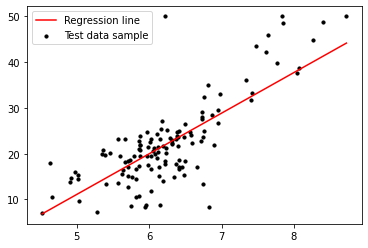

In [123]:
line_x = np.linspace(np.min(x_test), np.max(x_test), 10)
line_y = model.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test.T, y_test, s=10, c='black')
plt.plot(line_x, line_y, c ='red')
plt.legend(['Regression line', 'Test data sample'], loc='best')

## 다중선형회귀모델 (Multiple Linear Regression)
독립 변수가 둘 이상인 가장 일반적인 형태의 선형회귀모델
  
다중선형회귀모델의 구조는 아래와 같다.  

# $$ y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \cdots + \beta_p x_{i,p} + \varepsilon_i  $$  

> $\beta_0$ : 절편  
$\beta_p$ : $p$번째 독립변수의 계수  
$x_{i,p}$ : $i$ 번째 샘플의 $p$번째 독립변수 값  
$y_i$ : $i$ 번째 샘플의 종속변수 값  
$\hat{y}_i$ : $i$ 번째 샘플의 종속변수 예측 값 ($\hat{y}_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \cdots + \beta_p x_{i,p}$)  
$\varepsilon_i$ : $i$ 번째 샘플의 예측 오차 ($y_i - \hat{y}_i$)

행렬과 벡터를 이용한 표현으로 아래와 같이 표현이 가능하다.

# $$ y = X\beta + \varepsilon $$

![matrix](./image/matrix_sol.png)

### 모델학습 및 비용함수
기본선형회귀모델과 마찬가지로 최소자승법을 사용한다.

#### 비용함수
$$\varepsilon = y - \hat{y}$$  
$$\hat{y} = X\beta$$  
$$Q = \varepsilon\varepsilon^T = (y - \hat{y})(y - \hat{y})^T$$  
$$ =(y - X\beta)(y^T - X^T\beta^T) $$  
$$ =yy^T - yX^T\beta^T - X\beta y^T + X\beta X^T\beta^T$$

$$ {\partial Q \over \partial \beta} = 0 \Rightarrow \beta = (X^TX)^{-1}X^Ty$$
(행렬-벡터 미분 생략)

### 다중선형회귀모델 실습

In [125]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [130]:
X = df.drop('y', axis=1)
y = df['y']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [135]:
lr_model = LinearRegression()

In [136]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [137]:
y_pred = lr_model.predict(X_test)

## 선형회귀모델의 평가
선형회귀모델의 평가는 모델의 해석력, 그리고 모델의 설명력을 위한 평가방법으로 나눌 수 있다.

> RMSE : 평균제곱오차의 제곱근  
예측모델에서 가장 많이 쓰이는 지표, 예측이 대략 평균적으로 RMSE만큼 오차가 난다고 해석한다.
  
$$\sqrt{{1\over n}\sum_i^n{(y_i - \hat y_i)^2}}$$

> MAE : 평균절대 오차  
예측모델에서 종종 쓰이는 지표, 실제 예측값에 절대값을 씌워 예측결과 오차를 그대로 해석.  
  
$$\sum_i^n{\left\vert(y_i - \hat y_i)\right\vert}$$

> R2 score : 결정계수 혹은 설명계수. 독립변수가 얼마나 종속변수를 잘 설명할 수 있는지 나타냄.  
0과 1사이 범위에 있으며, 1에 가까울 수록 모델이 종속변수를 잘 설명한다고 해석한다.  
일반적으로는 R2 score가 0.6 이상이여야 사용가능한 모델이라고 해석한다.

![sst](./image/sst.png)

$$SST = SSR + SSE$$  
$$R^2 = 1 - {SSR \over SST}$$  
$$={1-SSE \over SST}$$  
$$={선형모형오차 \over 전체오차}$$

In [150]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = round(r2_score(y_test, y_pred), 4)
MSE = mean_squared_error(y_test, y_pred)
MAE = round(mean_absolute_error(y_test, y_pred), 4)
print(f'{lr_model} R2 score : {r2}')
print(f'{lr_model} RMSE score : {round(np.sqrt(MSE), 4)}')
print(f'{lr_model} MAE score : {MAE}')

LinearRegression() R2 score : 0.6822
LinearRegression() RMSE score : 5.2751
LinearRegression() MAE score : 3.7277


## 정규화 모델
> 설명 변수가 너무 많으면 정규화가 필요함.  
일반적으로 샘플 수가 변수 갯수보다 적거나 크게 많지 않다면 회귀모델은 과적합(overfitting)되는 경향이 있음.  
$\beta = (X^TX)^{-1}X^Ty$ 에서 $(X^TX)$의 역행렬을 구할 수 없음.  
회귀모델은 종속변수와 큰 관계가 없는 변수를 없애 주지 못함(수작업 필요). 최소자승법은 $\beta_i = 0$을 만들어주지 못함.  

### 과적합(overfitting)  
> 학습데이터로 학습한 모델의 테스트 데이터 예측 성능이 떨어지는 경우  
모델이 일반화를 잘 못 시키는 상태. 실제 데이터 예측을 잘 못함.

![overfitting](./image/overfitting.png)
![overfitting2](./image/overfitting2.png)

### Lasso 모델
> 기존 회귀모델의 비용함수에 계수 패널티$\lambda\sum_{j=1}^p\left\vert\beta_j\right\vert$를 추가
$$\sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda\sum_{j=1}^p\left\vert\beta_j\right\vert$$  
불필요한 변수의 회귀계수의 크기를 0으로 만듬  
많은 변수에 큰 패널티를 주며 불필요한 독립변수가 많을 경우 Lasso 모델을 사용한다.
![lasso](./image/lasso.png)

### Ridge 모델
> 기존 회귀모델의 비용함수에 계수 패널티$\lambda\sum_{j=1}^p\beta_j^2$를 추가
$$\sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda\sum_{j=1}^p\beta_j^2$$  
불필요한 변수의 회귀계수의 크기를 감소시킴  
많은 변수에 작은 패널티를 주며 독립변수가 적을 경우 Ridge 모델을 사용한다.
![ridge](./image/ridge.png)

### 정규화 모델 실습

In [152]:
from sklearn.linear_model import Ridge, Lasso

#### Ridge model

In [153]:
ridge_model = Ridge(alpha=100)

In [154]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=100)

In [155]:
ridge_model.coef_

array([-8.65263886e-02,  5.16326841e-02,  7.01647926e-03,  6.14431386e-01,
       -2.05858968e-01,  2.16780113e+00,  2.36943801e-04, -1.09812196e+00,
        3.05753827e-01, -1.66689551e-02, -9.56713592e-01,  1.10528419e-02,
       -6.41140428e-01])

In [156]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

<BarContainer object of 13 artists>

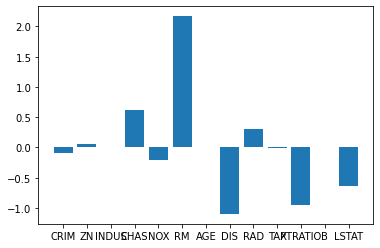

In [157]:
plt.bar(X_train.columns, ridge_model.coef_)

In [158]:
ridge_y_pred = ridge_model.predict(X_test)

In [165]:
print(round(np.sqrt(mean_squared_error(y_test, ridge_y_pred)), 4))

5.3927


#### Lasso model

In [187]:
lasso_model = Lasso(alpha=30)

In [188]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=30)

In [189]:
lasso_model.coef_

array([-0.        ,  0.02323195, -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.01862868,
       -0.        ,  0.01556107, -0.02231558])

<BarContainer object of 13 artists>

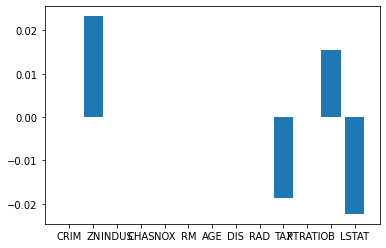

In [190]:
plt.bar(X_train.columns, lasso_model.coef_)

In [191]:
lasso_y_pred = lasso_model.predict(x_test)

In [194]:
print(round(np.sqrt(mean_squared_error(y_test, lasso_y_pred)), 4))

10.2481
